In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# Do this for saving permentntly files

Mounted at /content/drive


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"codingwithwadod","key":"0a6b104d8ec85d10069443ea35061a35"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets list
# Just for checking my Api token is working or not


ref                                                               title                                                     size  lastUpdated                 downloadCount  voteCount  usabilityRating  
----------------------------------------------------------------  --------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
abdulmalik1518/cars-datasets-2025                                 Cars Datasets (2025)                                     25987  2025-07-17 21:43:28.493000           7849        177  1.0              
shamimhasan8/crime-and-safety-dataset                             Crime & Safety Dataset                                   19871  2025-07-29 03:13:38.457000           1155         21  1.0              
sahilislam007/college-student-placement-factors-dataset           College Student Placement Factors Dataset               110450  2025-07-02 08:33:50.547000           9955        193  1.0     

In [ ]:
# Download and unzip dataset
!kaggle datasets download -d shaunthesheep/microsoft-catsvsdogs-dataset
!unzip microsoft-catsvsdogs-dataset.zip -d cats_vs_dogs


Streaming output truncated to the last 5000 lines.
  inflating: cats_vs_dogs/PetImages/Dog/550.jpg  
  inflating: cats_vs_dogs/PetImages/Dog/5500.jpg  
  inflating: cats_vs_dogs/PetImages/Dog/5501.jpg  
  inflating: cats_vs_dogs/PetImages/Dog/5502.jpg  
  inflating: cats_vs_dogs/PetImages/Dog/5503.jpg  
  inflating: cats_vs_dogs/PetImages/Dog/5504.jpg  
  inflating: cats_vs_dogs/PetImages/Dog/5505.jpg  
  inflating: cats_vs_dogs/PetImages/Dog/5506.jpg  
  inflating: cats_vs_dogs/PetImages/Dog/5507.jpg  
  inflating: cats_vs_dogs/PetImages/Dog/5508.jpg  
  inflating: cats_vs_dogs/PetImages/Dog/5509.jpg  
  inflating: cats_vs_dogs/PetImages/Dog/551.jpg  
  inflating: cats_vs_dogs/PetImages/Dog/5510.jpg  
  inflating: cats_vs_dogs/PetImages/Dog/5511.jpg  
  inflating: cats_vs_dogs/PetImages/Dog/5512.jpg  
  inflating: cats_vs_dogs/PetImages/Dog/5513.jpg  
  inflating: cats_vs_dogs/PetImages/Dog/5514.jpg  
  inflating: cats_vs_dogs/PetImages/Dog/5515.jpg  
  inflating: cats_vs_dogs/PetImag

Make subsets

In [ ]:
import pathlib, os, shutil

original_dir = pathlib.Path("cats_vs_dogs/PetImages")
base_dir = pathlib.Path("cats_vs_dogs_small")

def make_subset(subset_name, start_index, end_index):
    for category in ("Cat", "Dog"):
        src_dir = original_dir / category
        dst_dir = base_dir / subset_name / category.lower()
        os.makedirs(dst_dir, exist_ok=True)

        fnames = [f"{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            src = src_dir / fname
            dst = dst_dir / fname
            if src.exists():
                shutil.copyfile(src, dst)

make_subset("train", 0, 1000)
make_subset("validation", 1000, 1500)
make_subset("test", 1500, 2000)


In [ ]:
# Clean Corrupted or Empty Images
from PIL import Image

valid_exts = {".jpg", ".jpeg", ".png", ".bmp", ".gif"}

for subset in ["train", "validation", "test"]:
    for category in ["cat", "dog"]:
        folder = base_dir / subset / category
        print(f"Checking {folder}")
        for file in folder.iterdir():
            if file.suffix.lower() not in valid_exts:
                print(f"  Skipping invalid file: {file.name}")
                os.remove(file)
            else:
                try:
                    img = Image.open(file)
                    img.verify()
                except Exception:
                    print(f"  Removing corrupted image: {file.name}")
                    os.remove(file)


Checking cats_vs_dogs_small/train/cat
  Removing corrupted image: 666.jpg
Checking cats_vs_dogs_small/train/dog
Checking cats_vs_dogs_small/validation/cat
Checking cats_vs_dogs_small/validation/dog
Checking cats_vs_dogs_small/test/cat
Checking cats_vs_dogs_small/test/dog


Build Your CNN Model

In [ ]:
from tensorflow import keras
from keras import layers

# Define the input shape
inputs = keras.Input(shape=(180, 180, 3))

# Normalize pixel values from [0, 255] → [0, 1]
x = layers.Rescaling(1./255)(inputs)

# Convolutional layers
x = layers.Conv2D(32, 3, activation="relu")(x)
x = layers.MaxPooling2D(2)(x)

x = layers.Conv2D(64, 3, activation="relu")(x)
x = layers.MaxPooling2D(2)(x)

x = layers.Conv2D(128, 3, activation="relu")(x)
x = layers.MaxPooling2D(2)(x)

x = layers.Conv2D(256, 3, activation="relu")(x)
x = layers.MaxPooling2D(2)(x)

x = layers.Conv2D(256, 3, activation="relu")(x)

# Flatten and final output layer
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

# Create the model
model = keras.Model(inputs=inputs, outputs=outputs)


In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 18, 18, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 9, 9, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 7, 7, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │        12,545 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 991,041 (3.78 MB)

 Trainable params: 991,041 (3.78 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

Load your datasets

In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    base_dir / "train",
    image_size=(180, 180),
    batch_size=32,
)

validation_dataset = image_dataset_from_directory(
    base_dir / "validation",
    image_size=(180, 180),
    batch_size=32,
)

test_dataset = image_dataset_from_directory(
    base_dir / "test",
    image_size=(180, 180),
    batch_size=32,
)


Found 1999 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


Setup a Callback to Save the Best Model

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss"
    )
]


In [ ]:
# Train the Model
history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=10,
    callbacks=callbacks
)


Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 157ms/step - accuracy: 0.4853 - loss: 0.7308 - val_accuracy: 0.5000 - val_loss: 0.6982
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.5267 - loss: 0.6947 - val_accuracy: 0.5000 - val_loss: 0.7119
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - accuracy: 0.5782 - loss: 0.6870 - val_accuracy: 0.6430 - val_loss: 0.6512
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step - accuracy: 0.6465 - loss: 0.6359 - val_accuracy: 0.6510 - val_loss: 0.6215
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - accuracy: 0.6577 - loss: 0.6108 - val_accuracy: 0.6860 - val_loss: 0.5813
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - accuracy: 0.7010 - loss: 0.5705 - val_accuracy: 0.6920 - val_loss: 0.5749
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - accuracy: 0.7272 - loss: 0.5472 - val_accuracy: 0.6760 - val_loss: 0.5958
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - accuracy: 0.7193 - loss: 0.5166 - val_accuracy: 0.6840 -

In [ ]:
model = keras.models.load_model("convnet_from_scratch.keras")
test_model = model.evaluate(test_dataset)

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.6823 - loss: 0.5984


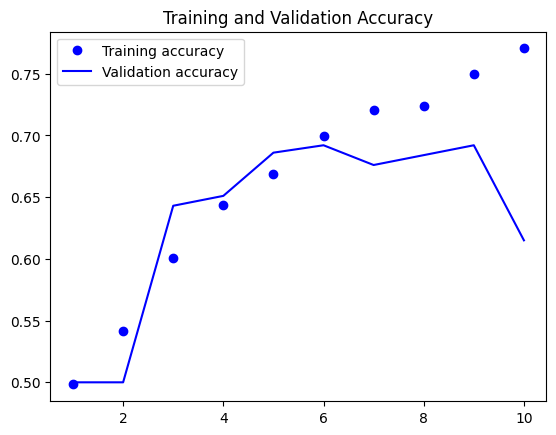

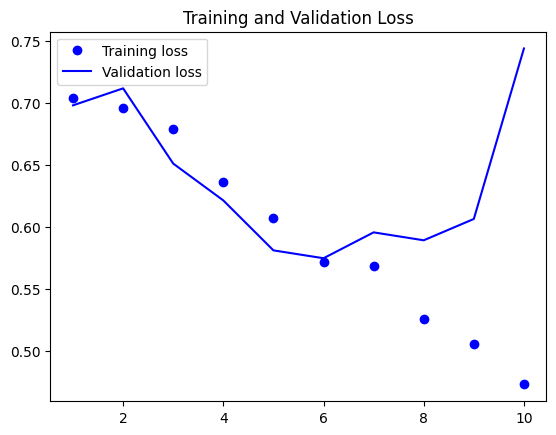

In [ ]:
import matplotlib.pyplot as plt

accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(accuracy) + 1)

# Plot training & validation accuracy
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()

plt.figure()

# Plot training & validation loss
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and Validation Loss")
plt.legend()

plt.show()


In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)


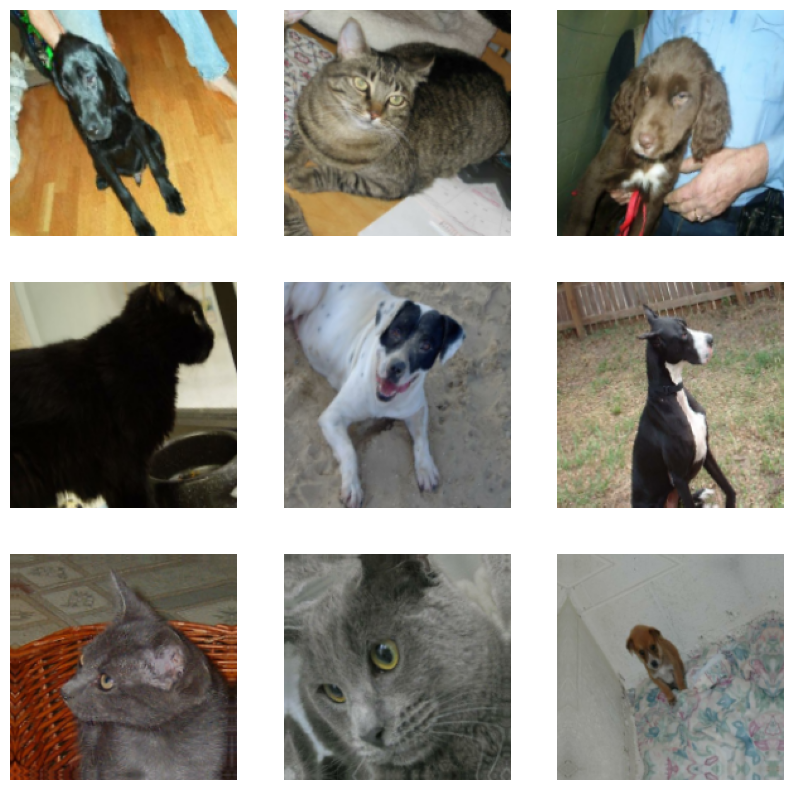

In [ ]:
# Augmentation on whole batch
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))

for images, _ in train_dataset.take(1):
    augmented_images = data_augmentation(images)
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[i].numpy().astype("uint8"))
        plt.axis("off")
plt.show()


In [ ]:
#  Defining a new convnet that includes image augmentation and dropout
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(loss="binary_crossentropy",
      optimizer="rmsprop",
      metrics=["accuracy"])

In [ ]:
# Training the regularized convnet
callbacks = [
    keras.callbacks.ModelCheckpoint(
 filepath="convnet_from_scratch_with_augmentation.keras",
 save_best_only=True,
 monitor="val_loss")
 ]
history = model.fit(
    train_dataset,
    epochs=80,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/80
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 64ms/step - accuracy: 0.4971 - loss: 0.7465 - val_accuracy: 0.5000 - val_loss: 0.6963
Epoch 2/80
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 69ms/step - accuracy: 0.5141 - loss: 0.6950 - val_accuracy: 0.5380 - val_loss: 0.6863
Epoch 3/80
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 0.5692 - loss: 0.6873 - val_accuracy: 0.6130 - val_loss: 0.6593
Epoch 4/80
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - accuracy: 0.6076 - loss: 0.6675 - val_accuracy: 0.6210 - val_loss: 0.6521
Epoch 5/80
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - accuracy: 0.6488 - loss: 0.6399 - val_accuracy: 0.6180 - val_loss: 0.6497
Epoch 6/80
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - accuracy: 0.6410 - loss: 0.6274 - val_accuracy: 0.5900 - val_loss: 0.6647
Epoch 7/80
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 78ms/step - accuracy: 0.6716 - loss: 0.6107 - val_accuracy: 0.6700 - val_loss: 0.6061
Epoch 8/80
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - accuracy: 0.6728 - loss: 0.5982 - val_accuracy: 0.6220 - v

In [ ]:
 test_model = keras.models.load_model(
 "convnet_from_scratch_with_augmentation.keras")
 test_loss, test_acc = test_model.evaluate(test_dataset)
 print(f"Test accuracy: {test_acc:.3f}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.8573 - loss: 0.4035
Test accuracy: 0.846
